# Parkinson's Disease Progression Prediction
### Project - SI 618: Data Manipulation and Analysis

Authors
1. Nowrin Mohamed - nowrin@umich.edu
2. Prithvijit Dasgupta - prithvid@umich.edu
3. Sachin Salim - sachinks@umich.edu

@misc{amp-parkinsons-disease-progression-prediction,
    author = {Leslie Kirsch, Sohier Dane, Stacey Adam, Victoria Dardov},
    title = {AMP®-Parkinson's Disease Progression Prediction},
    publisher = {Kaggle},
    year = {2023},
    url = {https://kaggle.com/competitions/amp-parkinsons-disease-progression-prediction}
}

References:
1. Baseline model - https://www.kaggle.com/code/renataghisloti/linearregression-simple-57-3-smape

In [292]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [293]:
supplemental_clinical_data = pd.read_csv('data/supplemental_clinical_data.csv')
peptides_data = pd.read_csv('data/train_peptides.csv') 
clinical_data = pd.read_csv('data/train_clinical_data.csv') 
proteins_data = pd.read_csv('data/train_proteins.csv')

# Proteins

### Feature extraction

In [294]:
proteins_features = proteins_data.pivot(index='visit_id', columns='UniProt', values='NPX')
proteins_features

UniProt,O00391,O00533,O00584,O14498,O14773,O14791,O15240,O15394,O43505,O60888,...,Q9HDC9,Q9NQ79,Q9NYU2,Q9UBR2,Q9UBX5,Q9UHG2,Q9UKV8,Q9UNU6,Q9Y646,Q9Y6R7
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,9104.27,402321.0,NaN,NaN,7150.57,2497.84,83002.9,15113.6,167327.0,129048.0,...,NaN,9469.45,94237.6,NaN,23016.0,177983.0,65900.0,15382.0,NaN,19017.40
10053_12,10464.20,435586.0,NaN,NaN,NaN,NaN,197117.0,15099.1,164268.0,108114.0,...,NaN,14408.40,NaN,NaN,28537.0,171733.0,65668.1,NaN,9295.65,25697.80
10053_18,13235.70,507386.0,7126.96,24525.7,NaN,2372.71,126506.0,16289.6,168107.0,163776.0,...,317477.0,38667.20,111107.0,NaN,37932.6,245188.0,59986.1,10813.3,NaN,29102.70
10138_12,12600.20,494581.0,9165.06,27193.5,22506.10,6015.90,156313.0,54546.4,204013.0,56725.0,...,557904.0,44556.90,155619.0,14647.90,36927.7,229232.0,106564.0,26077.7,21441.80,7642.42
10138_24,12003.20,522138.0,4498.51,17189.8,29112.40,2665.15,151169.0,52338.1,240892.0,85767.1,...,NaN,47836.70,177619.0,17061.10,25510.4,176722.0,59471.4,12639.2,15091.40,6168.55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,9983.00,400290.0,24240.10,NaN,16943.50,6303.17,77493.6,46435.3,254247.0,138910.0,...,NaN,25690.60,NaN,6859.82,19106.7,121161.0,113872.0,14413.9,28225.50,8062.07
942_12,6757.32,360858.0,18367.60,14760.7,18603.40,1722.77,86847.4,37741.3,212132.0,100519.0,...,45742.3,33518.60,94049.7,13415.70,21324.7,234094.0,82410.4,19183.7,17804.10,12277.00
942_24,NaN,352722.0,22834.90,23393.1,16693.50,1487.91,114772.0,36095.7,185836.0,99183.5,...,180475.0,29770.60,95949.9,11344.40,23637.6,256654.0,76931.9,19168.2,19215.90,14625.60


### Filling nan

Filling with average of each protein

In [295]:
# TODO: Use a better method to fill nan
proteins_features.fillna(proteins_features.mean(), inplace=True)

# Peptides

In [296]:
peptide_features = peptides_data.pivot(index='visit_id', columns='Peptide', values='PeptideAbundance')
peptide_features

Peptide,AADDTWEPFASGK,AAFGQGSGPIMLDEVQC(UniMod_4)TGTEASLADC(UniMod_4)K,AAFTEC(UniMod_4)C(UniMod_4)QAADK,AANEVSSADVK,AATGEC(UniMod_4)TATVGKR,AATVGSLAGQPLQER,AAVYHHFISDGVR,ADDKETC(UniMod_4)FAEEGK,ADDKETC(UniMod_4)FAEEGKK,ADDLGKGGNEESTKTGNAGSR,...,YSLTYIYTGLSK,YTTEIIK,YVGGQEHFAHLLILR,YVM(UniMod_35)LPVADQDQC(UniMod_4)IR,YVMLPVADQDQC(UniMod_4)IR,YVNKEIQNAVNGVK,YWGVASFLQK,YYC(UniMod_4)FQGNQFLR,YYTYLIMNK,YYWGGQYTWDMAK
visit_id,,,,,,,,,,,,,,,,,,,,,
10053_0,6580710.0,31204.4,7735070.0,NaN,NaN,NaN,46620.3,236144.0,NaN,NaN,...,202274.0,NaN,4401830.0,77482.6,583075.0,76705.7,104260.0,530223.0,NaN,7207.30
10053_12,6333510.0,52277.6,5394390.0,NaN,NaN,NaN,57554.5,108298.0,45885.4,NaN,...,201009.0,NaN,5001750.0,36745.3,355643.0,92078.1,123254.0,453883.0,49281.9,25332.80
10053_18,7129640.0,61522.0,7011920.0,35984.7,17188.00,19787.3,36029.4,708729.0,5067790.0,30838.2,...,220728.0,NaN,5424380.0,39016.0,496021.0,63203.6,128336.0,447505.0,52389.1,21235.70
10138_12,7404780.0,46107.2,10610900.0,NaN,20910.20,66662.3,55253.9,79575.5,6201210.0,26720.0,...,188362.0,9433.71,3900280.0,48210.3,328482.0,89822.1,129964.0,552232.0,65657.8,9876.98
10138_24,13788300.0,56910.3,6906160.0,13785.5,11004.20,63672.7,36819.8,34160.9,2117430.0,15645.2,...,206187.0,6365.15,3521800.0,69984.6,496737.0,80919.3,111799.0,NaN,56977.6,4903.09
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8699_24,6312970.0,44462.7,12455000.0,11051.3,1163.18,43279.8,67743.5,325328.0,4666550.0,11038.5,...,289888.0,8615.27,8770410.0,33599.1,926094.0,118897.0,133682.0,571879.0,80268.3,54889.70
942_12,11289900.0,46111.7,11297300.0,NaN,13894.10,53755.0,40289.3,565112.0,NaN,26495.8,...,173259.0,4767.63,374307.0,35767.3,250397.0,65966.9,77976.8,486239.0,45032.7,NaN
942_24,10161900.0,32145.0,12388000.0,25869.2,17341.80,48625.5,45223.9,84448.0,4684800.0,23150.2,...,185428.0,5554.53,NaN,64049.8,479473.0,68505.7,74483.1,561398.0,52916.4,21847.60


In [297]:
peptide_features.fillna(peptide_features.mean(), inplace=True)

In [298]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [299]:
scaler = StandardScaler()
scaled_peptide = scaler.fit_transform(peptide_features)

Keep 216 components in PCA


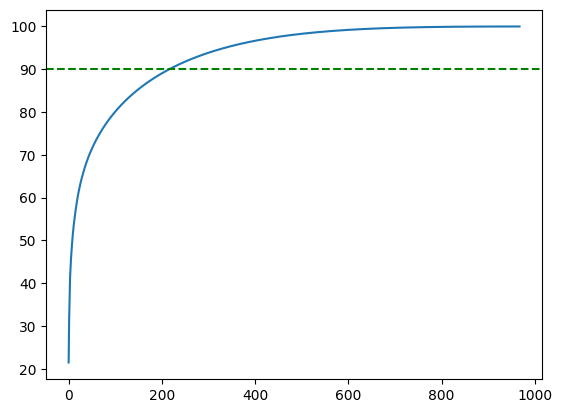

In [300]:
pca = PCA(random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
cumsum_var = 100 * np.cumsum(pca.explained_variance_ratio_)
plt.plot(cumsum_var)
perc_retained = 90
plt.axhline(perc_retained, color='g', linestyle='--')
print(f"Keep {np.argmax(cumsum_var > perc_retained)} components in PCA")

In [301]:
pca = PCA(n_components = 216, random_state=42)
X_pca = pca.fit_transform(scaled_peptide)
X_pca.shape

(1113, 216)

# Clinical data

`supplemental_clinical_data` contains patients whose proteins were never measured.

`clinical_data` patients had their proteins measured, but not on all visits

### y extraction

TODO: Use `upd23b_clinical_state_on_medication` as X feature

In [302]:
clinical_features = clinical_data[['visit_id', 'updrs_1', 'updrs_2', 'updrs_3', 'updrs_4']].copy()
clinical_features.set_index('visit_id', inplace=True)

In [303]:
X_indices = peptide_features.index
y_indices = clinical_features.index

common_indices = np.intersect1d(X_indices.values, y_indices.values)
print(f"{len(common_indices)} items are common between input features\
 and clinical data")

miss_indices = np.setdiff1d(X_indices.values, y_indices.values)
print(f"{len(miss_indices)} items in input features are missing in clinical data")

1068 items are common between input features and clinical data
45 items in input features are missing in clinical data


Transforming clinical data

In [304]:
def add_month_columns(df, add_month):
    multi_cols = pd.MultiIndex.from_product(
        [[add_month], df.columns],
        names=['add_month', 'updrs'])

    # Add the MultiIndex to the DataFrame
    df.columns = multi_cols
    return df

def df_with_n_extra_month(clinical_df, add_month = 0):
    clinical_extra_df = clinical_df.copy()
    # setting to nan as default
    clinical_extra_df.loc[:] = np.nan

    clinical_extra_df.index = clinical_extra_df.index.set_levels(
        clinical_extra_df.index.get_level_values('visit_month') + add_month,
        level=1)
    clinical_extra_df

    clinical_df = clinical_df.droplevel(0)
    clinical_extra_df = clinical_extra_df.droplevel(0)

    common_indices = pd.Index(np.intersect1d(clinical_df.index.values, clinical_extra_df.index.values))

    clinical_extra_df.loc[
        common_indices,
        clinical_df.columns] = clinical_df.loc[
            common_indices,
            clinical_df.columns].values

    return clinical_extra_df
    
def transform_clinical_data(clinical_df):
    # select indices
    clinical_df.set_index(['patient_id', 'visit_month'], inplace=True)

    all_clinical_extras = []
    for extra_month in [0, 6, 12, 24]:
        clinical_extra = df_with_n_extra_month(clinical_df, add_month = extra_month)
        clinical_extra = add_month_columns(clinical_extra, add_month = extra_month)
        clinical_extra.reset_index(drop=True, inplace=True)
        all_clinical_extras.append(clinical_extra)
        
    clinical_features_final = pd.concat(all_clinical_extras, axis=1) #.set_index('visit_month')
    clinical_features_final.index = clinical_df.index

    return clinical_features_final

In [305]:
clinical_data.columns

Index(['visit_id', 'patient_id', 'visit_month', 'updrs_1', 'updrs_2',
       'updrs_3', 'updrs_4', 'upd23b_clinical_state_on_medication'],
      dtype='object')

In [306]:
clinical_features = clinical_data.drop(columns="upd23b_clinical_state_on_medication").copy()
clinical_features = clinical_features.query('patient_id == 55')

In [307]:
clinical_features = clinical_data.drop(
    columns=["visit_id", "upd23b_clinical_state_on_medication"]).copy()
clinical_features = clinical_features.query('patient_id == 55')

clinical_features_final = transform_clinical_data(clinical_features)
print(clinical_features_final.shape)
clinical_features_final

(13, 16)


add_month                   0                               6           \
updrs                  updrs_1 updrs_2 updrs_3 updrs_4 updrs_1 updrs_2   
patient_id visit_month                                                   
55         0              10.0     6.0     6.0     NaN     8.0    10.0   
           3              10.0     7.0    19.0     NaN     8.0     9.0   
           6               8.0    10.0    58.0     NaN    10.0    10.0   
           9               8.0     9.0    17.0     0.0     NaN     NaN   
           12             10.0    10.0     2.0     0.0     7.0    13.0   
           18              7.0    13.0     7.0     0.0    16.0     9.0   
           24             16.0     9.0    16.0     0.0    14.0    13.0   
           30             14.0    13.0    21.0     0.0    17.0    18.0   
           36             17.0    18.0     9.0     0.0    12.0    20.0   
           42             12.0    20.0     4.0     0.0    17.0    16.0   
           48             17.0    16.0    51.0     0.0    12.0    18.0   
           54             12.0    18.0    55.0     0.0    23.0    21.0   
           60             23.0    21.0     0.0     0.0     NaN     NaN   

add_month                                   12                          \
updrs                  updrs_3 updrs_4 updrs_1 updrs_2 updrs_3 updrs_4   
patient_id visit_month                                                   
55         0              58.0     NaN    10.0    10.0     2.0     0.0   
           3              17.0     0.0     NaN     NaN     NaN     NaN   
           6               2.0     0.0     7.0    13.0     7.0     0.0   
           9               NaN     NaN     NaN     NaN     NaN     NaN   
           12              7.0     0.0    16.0     9.0    16.0     0.0   
           18             16.0     0.0    14.0    13.0    21.0     0.0   
           24             21.0     0.0    17.0    18.0     9.0     0.0   
           30              9.0     0.0    12.0    20.0     4.0     0.0   
           36              4.0     0.0    17.0    16.0    51.0     0.0   
           42             51.0     0.0    12.0    18.0    55.0     0.0   
           48             55.0     0.0    23.0    21.0     0.0     0.0   
           54              0.0     0.0     NaN     NaN     NaN     NaN   
           60              NaN     NaN     NaN     NaN     NaN     NaN   

add_month                   24                          
updrs                  updrs_1 updrs_2 updrs_3 updrs_4  
patient_id visit_month                                  
55         0              16.0     9.0    16.0     0.0  
           3               NaN     NaN     NaN     NaN  
           6              14.0    13.0    21.0     0.0  
           9               NaN     NaN     NaN     NaN  
           12             17.0    18.0     9.0     0.0  
           18             12.0    20.0     4.0     0.0  
           24             17.0    16.0    51.0     0.0  
           30             12.0    18.0    55.0     0.0  
           36             23.0    21.0     0.0     0.0  
           42              NaN     NaN     NaN     NaN  
           48              NaN     NaN     NaN     NaN  
           54              NaN     NaN     NaN     NaN  
           60              NaN     NaN     NaN     NaN

### Filling nan

Filling with average of each updrs

In [308]:
mean_values = clinical_features.mean(numeric_only=True).astype(int)
clinical_features.fillna(mean_values, inplace=True)
clinical_features = clinical_features.astype({'updrs_1': 'int64', 'updrs_2': 'int64', 'updrs_3': 'int64', 'updrs_4': 'int64'})
display(clinical_features.head(7))
display(clinical_features.dtypes)

updrs_1  updrs_2  updrs_3  updrs_4
patient_id visit_month                                    
55         0                 10        6        6        0
           3                 10        7       19        0
           6                  8       10       58        0
           9                  8        9       17        0
           12                10       10        2        0
           18                 7       13        7        0
           24                16        9       16        0

updrs_1    int64
updrs_2    int64
updrs_3    int64
updrs_4    int64
dtype: object

<AxesSubplot: ylabel='Frequency'>

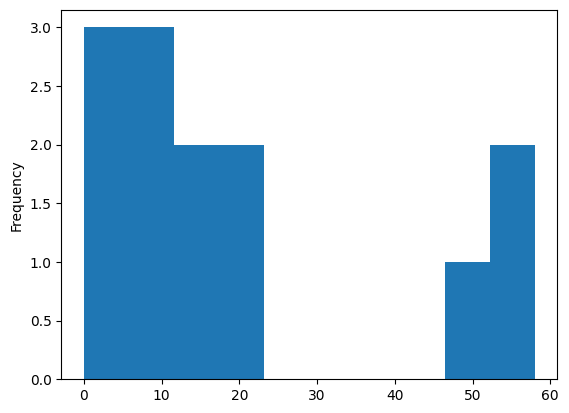

In [309]:
clinical_features['updrs_3'].plot.hist()